In [1]:
import glob
import pandas as pd
import numpy as np
from scipy.stats import sem
import matplotlib.pyplot as plt

dqn_aaa = []
for score in glob.glob(r"sushi-rl\results\dqn_aaa\*\*\scores.csv"):
    dqn_aaa.append(score)

In [2]:
def step_count(path_i):
    return abs(int(path_i[48]) - int(path_i[-16]))

In [3]:
step_0 = []
step_1 = []
step_2 = []
step_3 = []
step_4 = []

for i in range(len(dqn_aaa)):
    if step_count(dqn_aaa[i]) == 0:
        step_0.append(dqn_aaa[i])
    if step_count(dqn_aaa[i]) == 1:
        step_1.append(dqn_aaa[i])
    if step_count(dqn_aaa[i]) == 2:
        step_2.append(dqn_aaa[i])
    if step_count(dqn_aaa[i]) == 3:
        step_3.append(dqn_aaa[i])
    if step_count(dqn_aaa[i]) == 4:
        step_4.append(dqn_aaa[i])

In [4]:
step_0_results = []
for item in step_0:
    df = pd.read_csv(item)
    step_0_results.append(df.idxmax(axis=1).value_counts().sort_index()[-1]/100)
s0 = sum(step_0_results)/len(step_0_results)
s0_sem = sem(step_0_results)

step_1_results = []
for item in step_1:
    df = pd.read_csv(item)
    step_1_results.append(df.idxmax(axis=1).value_counts().sort_index()[-1]/100)
s1 = sum(step_1_results)/len(step_1_results)
s1_sem = sem(step_1_results)

step_2_results = []
for item in step_2:
    df = pd.read_csv(item)
    step_2_results.append(df.idxmax(axis=1).value_counts().sort_index()[-1]/100)
s2 = sum(step_2_results)/len(step_2_results)
s2_sem = sem(step_2_results)

step_3_results = []
for item in step_3:
    df = pd.read_csv(item)
    step_3_results.append(df.idxmax(axis=1).value_counts().sort_index()[-1]/100)
s3 = sum(step_3_results)/len(step_3_results)
s3_sem = sem(step_3_results)

step_4_results = []
for item in step_4:
    df = pd.read_csv(item)
    step_4_results.append(df.idxmax(axis=1).value_counts().sort_index()[-1]/100)
s4 = sum(step_4_results)/len(step_4_results)
s4_sem = sem(step_4_results)

dqn_avg = [s0,s1,s2,s3,s4]
dqn_sem = [s0_sem, s1_sem, s2_sem, s3_sem, s4_sem]

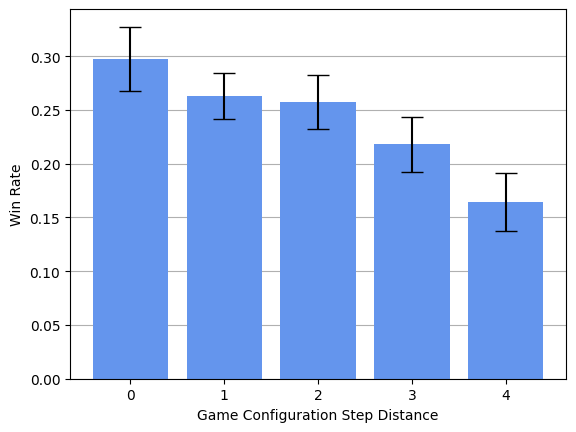

In [38]:
plt.bar([0,1,2,3,4], dqn_avg, yerr=dqn_sem, capsize=8, color="cornflowerblue")
plt.xlabel("Game Configuration Step Distance")
plt.ylabel('Win Rate')
plt.rc('axes', axisbelow=True)
plt.grid(axis = "y")